In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_raw = pd.read_csv("HR_Analytics.csv")

# make a copy of the original source file
df = df_raw.copy()

print("Size of dataset is: {}".format(df.shape))
df.head()

Size of dataset is: (1480, 38)


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
# dataset columns
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
# groupby column data types
df.columns.groupby(df.dtypes)

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'], float64: ['YearsWithCurrManager'], object: ['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'Over18', 'OverTime']}

In [6]:
# check for missing values
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [7]:
# summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# summary statistics
df.describe(include="all")

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480,1480.000000,1480,1480,1480,1480.000000,1480,1480.000000,1480.000000,1480,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
unique,1470,NaN,5,2,4,NaN,3,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RM1462,NaN,26-35,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,611,1242,1042,NaN,967,NaN,NaN,607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.917568,NaN,NaN,NaN,801.384459,NaN,9.220270,2.910811,NaN,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,NaN,9.128559,NaN,NaN,NaN,403.126988,NaN,8.131201,1.023796,NaN,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,NaN,18.000000,NaN,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,NaN,36.000000,NaN,NaN,NaN,800.000000,NaN,7.000000,3.000000,NaN,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,NaN,43.000000,NaN,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


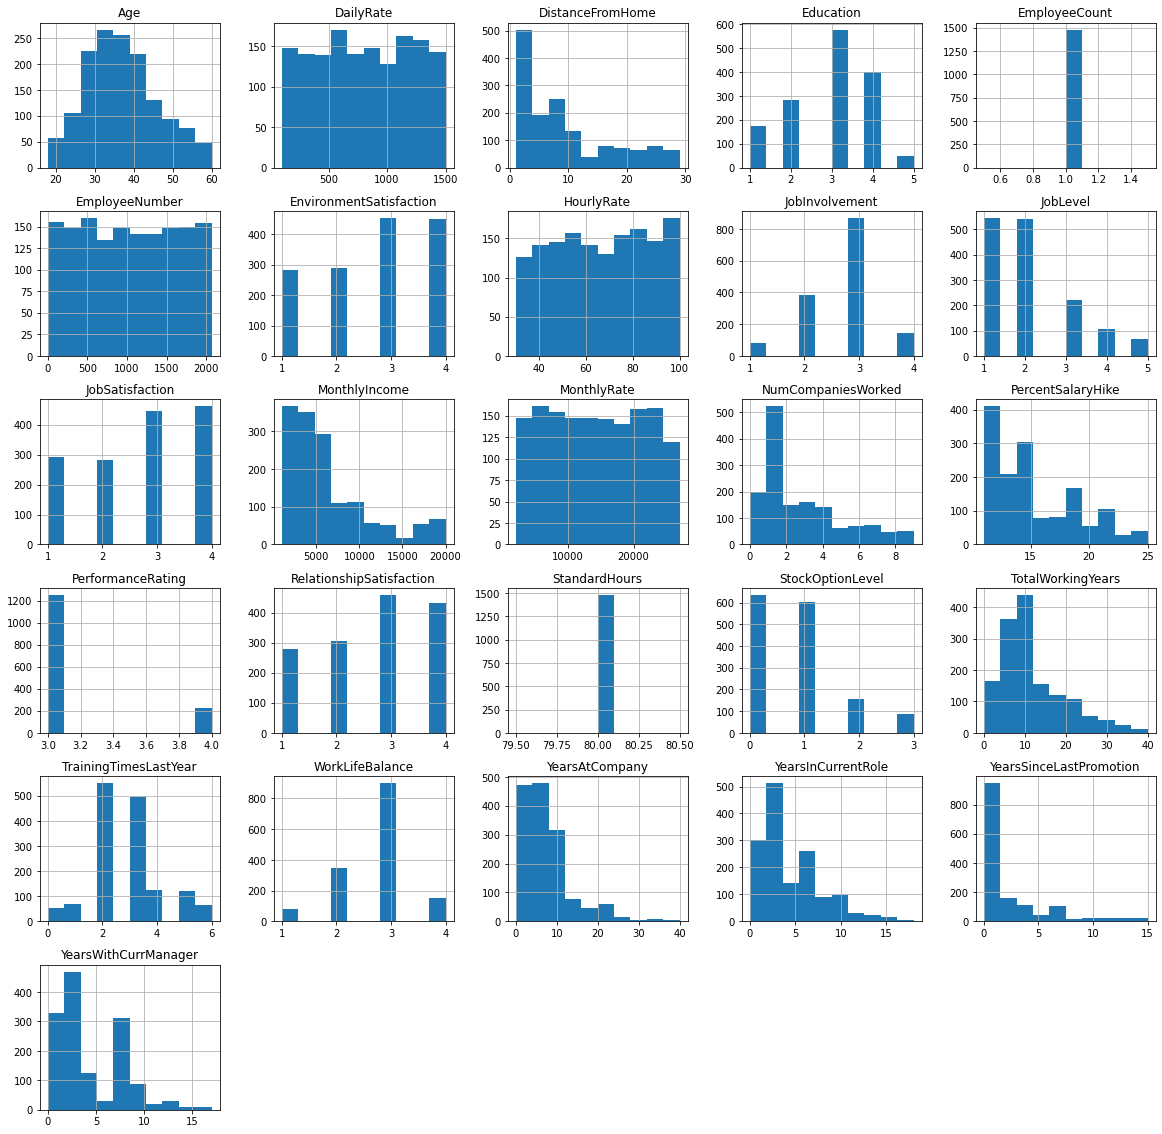

In [9]:
# plot histogram for numeric columns
df.hist(figsize=(20,20))
# plt.savefig("histograms.png", bbox_inches="tight")
plt.show()

In [10]:
# Age
print("Age of employees is from {} to {} years old.".format(df['Age'].min(), df['Age'].max()))

Age of employees is from 18 to 60 years old.


In [11]:
# Ex-Employees
print("Ex-Employees:")
print("Average Age of Ex-Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'Age'])))

Ex-Employees:
Average Age of Ex-Employees = 33.7
Standard Deviation = 9.7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


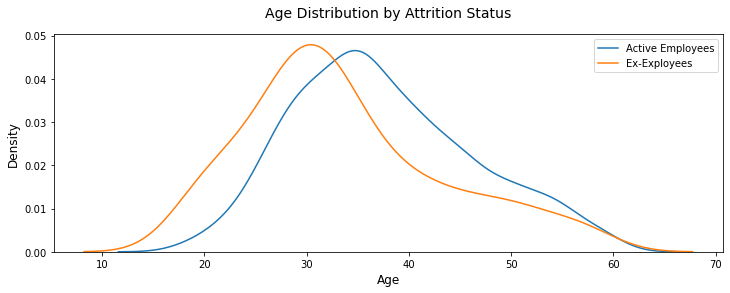

In [12]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


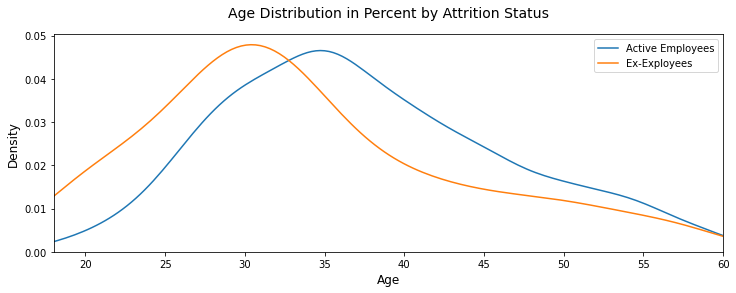

In [13]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlim(df["Age"].min(), df["Age"].max())
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution in Percent by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()

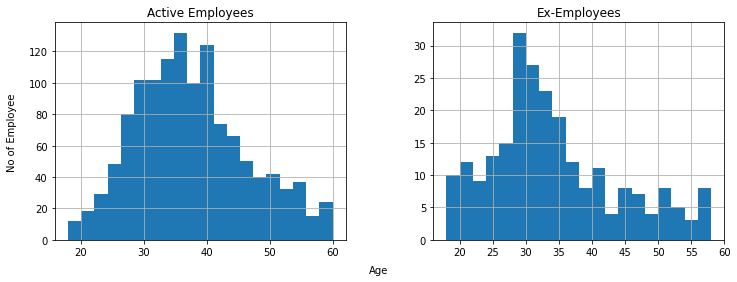

In [14]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['Age']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['Age']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Age', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("age_hist.png", bbox_inches="tight")
plt.show()

In [15]:
# Gender of employees
df['Gender'].value_counts()

Male      889
Female    591
Name: Gender, dtype: int64

In [16]:
# Gender of employees
df['Gender'].value_counts(normalize=True)

Male      0.600676
Female    0.399324
Name: Gender, dtype: float64

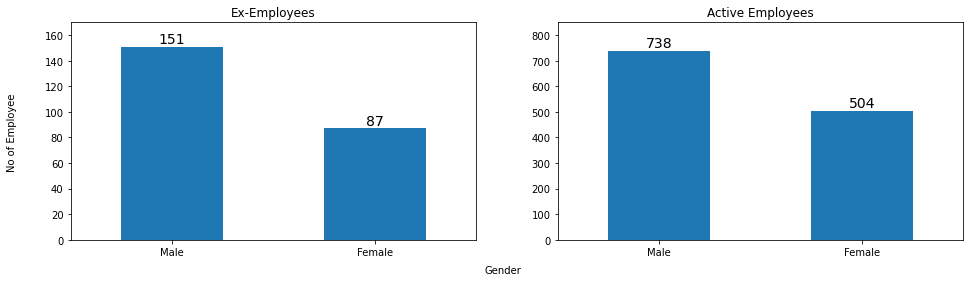

In [17]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_1.png", bbox_inches="tight")
plt.show()

Text(0.07, 0.5, '% of Employee')

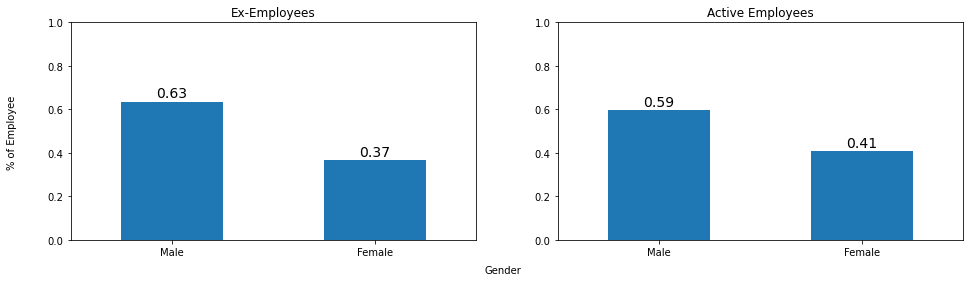

In [18]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig(

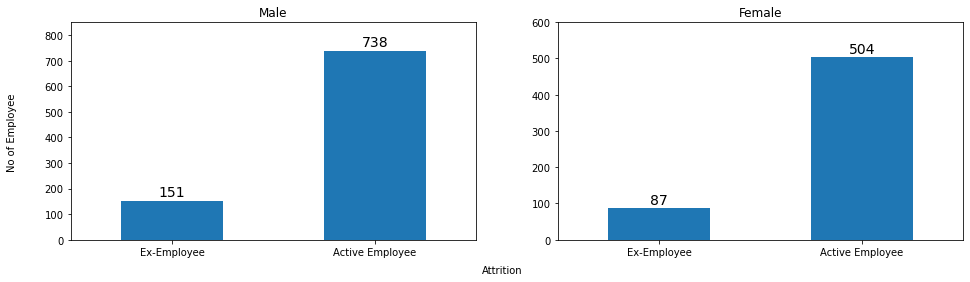

In [19]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_3.png", bbox_inches="tight")
plt.show()

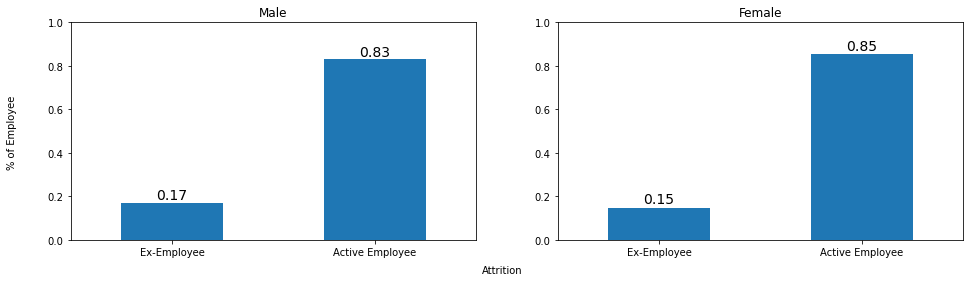

In [20]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.015, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_4.png", bbox_inches="tight")
plt.show()

In [21]:
# marital Status of employees
df['MaritalStatus'].value_counts(normalize=True)

Married     0.458784
Single      0.319595
Divorced    0.221622
Name: MaritalStatus, dtype: float64

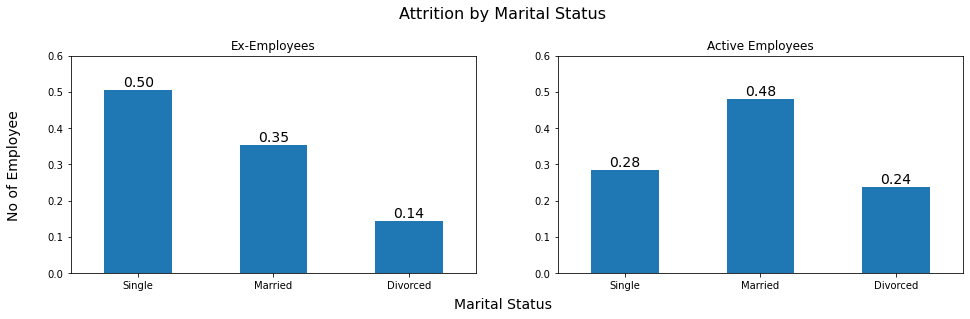

In [22]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "MaritalStatus"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "MaritalStatus"].value_counts(normalize=True).reindex(["Single", "Married","Divorced"]).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition by Marital Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_2.png", bbox_inches="tight")
plt.show()

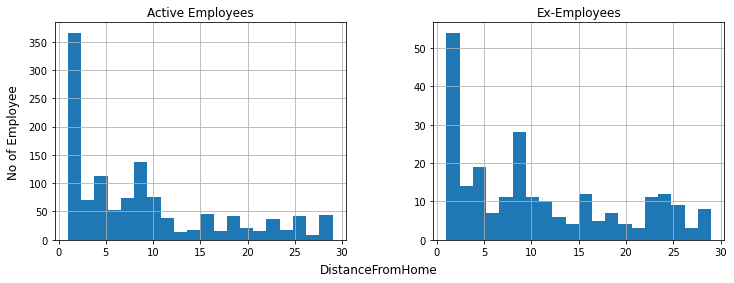

In [23]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['DistanceFromHome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['DistanceFromHome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'DistanceFromHome', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("distance_hist.png", bbox_inches="tight")
plt.show()

In [24]:
# departments
df['Department'].value_counts(normalize=True)

Research & Development    0.653378
Sales                     0.304054
Human Resources           0.042568
Name: Department, dtype: float64

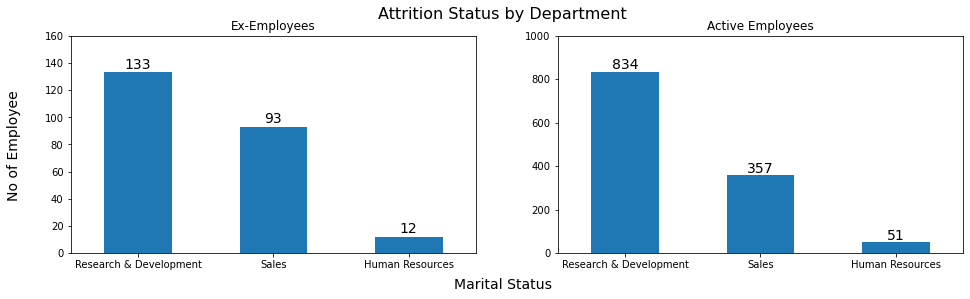

In [25]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Department'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,160)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Department'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Department', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("dept_hist_1.png", bbox_inches="tight")
plt.show()

In [26]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

Sales Executive              329
Research Scientist           293
Laboratory Technician        261
Manufacturing Director       147
Healthcare Representative    132
Manager                      102
Sales Representative          84
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [27]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts(normalize=True)

Sales Executive              0.222297
Research Scientist           0.197973
Laboratory Technician        0.176351
Manufacturing Director       0.099324
Healthcare Representative    0.089189
Manager                      0.068919
Sales Representative         0.056757
Research Director            0.054054
Human Resources              0.035135
Name: JobRole, dtype: float64

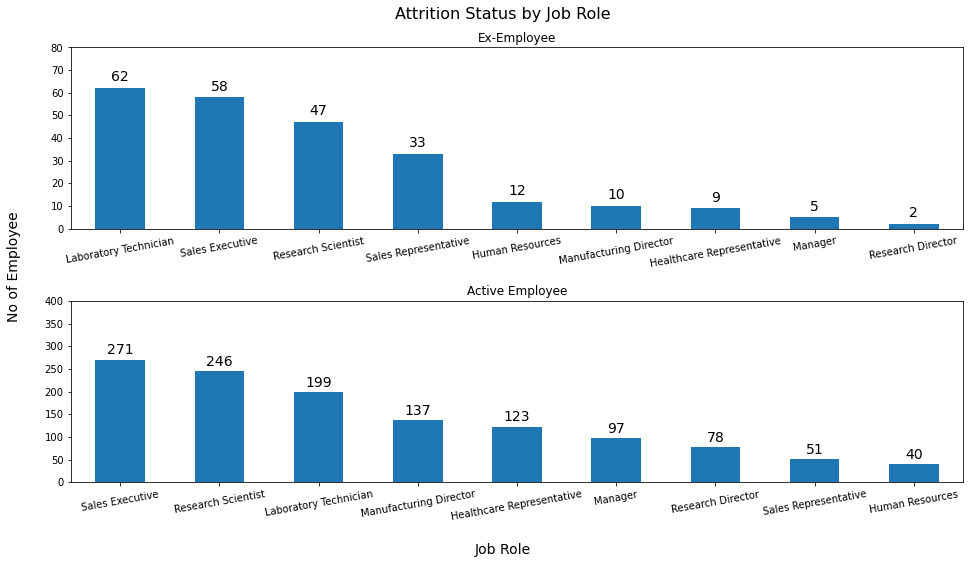

In [28]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,80)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts().plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("role_hist_1.png", bbox_inches="tight")
plt.show()